In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Telco Churn Dataset.csv")

In [4]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


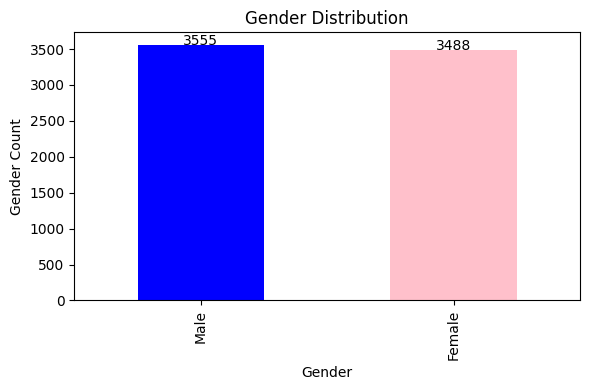

In [9]:
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
for i, v in enumerate(gender_counts):
    plt.text(i, v + 1, str(v), ha='center')
plt.xlabel('Gender')
plt.ylabel('Gender Count')
plt.title('Gender Distribution')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Churn Count')

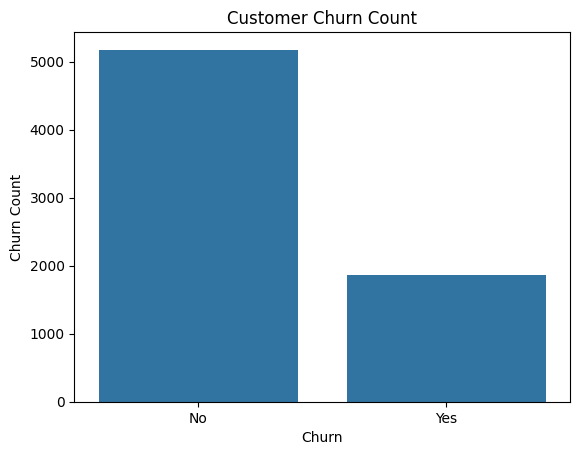

In [12]:
#checking distribution of churn
churn_rate =sns.countplot(data=df, x='Churn')
churn_rate.set_title("Customer Churn Count")
churn_rate.set_ylabel("Churn Count")
#proportion of not churned people is significantly higher (will still attempt applying ML)

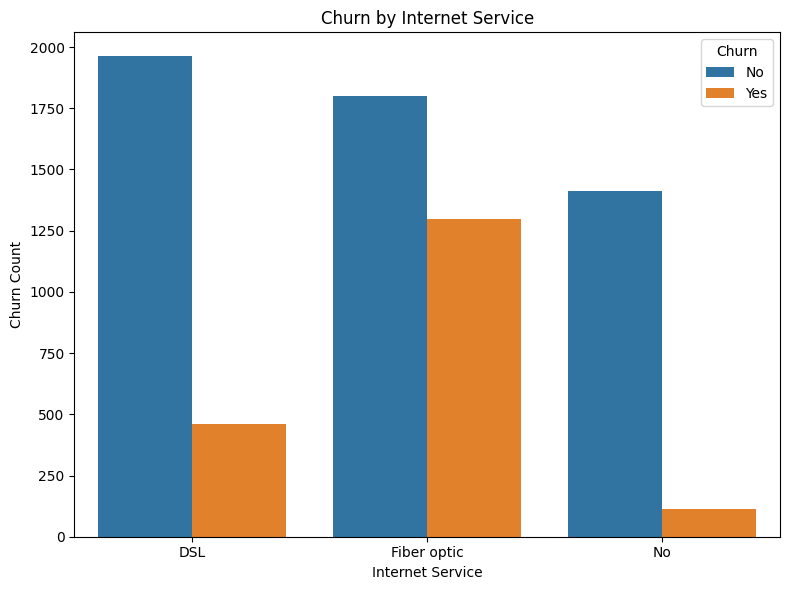

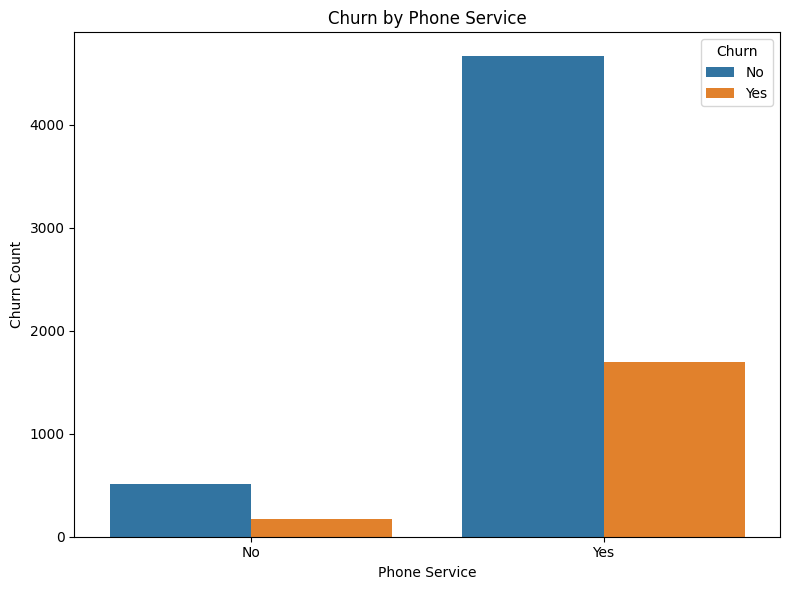

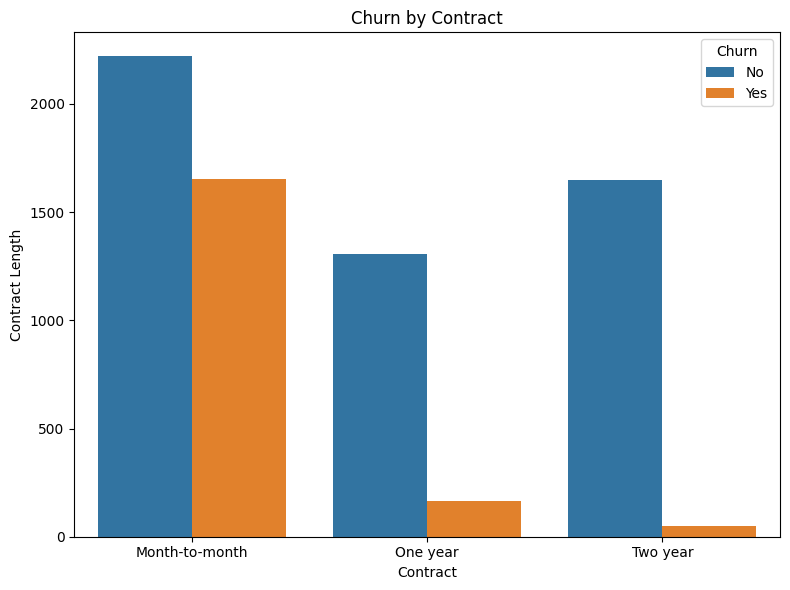

In [19]:
#EXPLORING CHUSTOMER CHURN BASED ON THEIR SERVICES USED

# Churn by InternetService
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Churn Count')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

# Churn by PhoneService
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='PhoneService', hue='Churn')
plt.title('Churn by Phone Service')
plt.xlabel('Phone Service')
plt.ylabel('Churn Count')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

# Churn by Contract
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract')
plt.xlabel('Contract')
plt.ylabel('Contract Length')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

In [20]:
# Drop customerID
df.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing TotalCharges
df.dropna(subset=['TotalCharges'], inplace=True)

# Encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Standardize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(
    df_encoded[['tenure', 'MonthlyCharges', 'TotalCharges']]
)


In [21]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.7867803837953091
              precision    recall  f1-score   support

       False       0.83      0.89      0.86      1033
        True       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7846481876332623
              precision    recall  f1-score   support

       False       0.83      0.90      0.86      1033
        True       0.62      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7739872068230277
              precision    recall  f1-score   support

       False       0.83      0.87      0.85      1033
        True       0.59      0.50      0.54       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.69      1407
weighted avg       0.76      0.77      0.77      1407



c:\Users\aruna\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:17:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
